# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


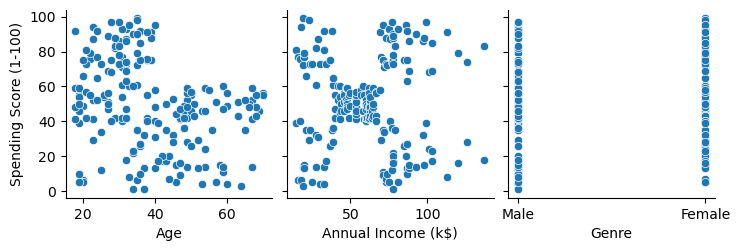

In [5]:
sns.pairplot(
    df,
    x_vars = ['Age', 'Annual Income (k$)', 'Genre'],
    y_vars = ['Spending Score (1-100)'],
)

# Вывод из графического анализа:
1) из графика зависимости Spending Score от Annual Income видно, что имеет место четкое разбиение данных на группы
2) Из анализа графика зависимости Spending Score от Age четкой зависимости не прослеживается, но при этом есть область на графике, где данные вообще отсутствуют.

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

# На основе разведочного анализа данных можно сделать предположение:
из графика зависимости Spending Score от Annual Income можно предположить, что группы покупателей можно разбить на 5 клатеров. При этом явного (четкого) количества кластеров из графика зависимости Spending Score от Age не видно.

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

In [6]:
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output=False)

ft = ohe.fit_transform(df[['Genre']])

xt_ft = pd.DataFrame(ft, columns = ohe.get_feature_names_out())
xt_ft

,Genre_Male
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
195,0.0
196,0.0
197,1.0
198,1.0


In [7]:
df_1 = pd.concat([df, xt_ft], axis=1)
df_1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,Male,19,15,39,1.0
1,2,Male,21,15,81,1.0
2,3,Female,20,16,6,0.0
3,4,Female,23,16,77,0.0
4,5,Female,31,17,40,0.0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0.0
196,197,Female,45,126,28,0.0
197,198,Male,32,126,74,1.0
198,199,Male,32,137,18,1.0


In [8]:
df_1 = df_1.drop(columns=['Genre'], axis=1)
df_1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


In [9]:
X = df_1[['Age', 'Annual Income (k$)', 'Genre_Male']]
y = df_1['Spending Score (1-100)']
X.head()

,Age,Annual Income (k$),Genre_Male
0,19,15,1.0
1,21,15,1.0
2,20,16,0.0
3,23,16,0.0
4,31,17,0.0


In [10]:
scaler = StandardScaler()

X_scl = scaler.fit_transform(X)

xt_std = pd.DataFrame(X_scl, columns = scaler.get_feature_names_out())
xt_std

,Age,Annual Income (k$),Genre_Male
0,-1.424569,-1.738999,1.128152
1,-1.281035,-1.738999,1.128152
2,-1.352802,-1.700830,-0.886405
3,-1.137502,-1.700830,-0.886405
4,-0.563369,-1.662660,-0.886405
...,...,...,...
195,-0.276302,2.268791,-0.886405
196,0.441365,2.497807,-0.886405
197,-0.491602,2.497807,1.128152
198,-0.491602,2.917671,1.128152


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [11]:
kmeans = KMeans(n_clusters = 5, random_state=42)

kmeans.fit(df_1)

#df_1['cluster'] = kmeans.labels_

points = kmeans.predict(df_1)

df_1.head()

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


In [12]:
df_2 = df_1[['Age', 'Annual Income (k$)', 'Genre_Male', 'Spending Score (1-100)']]
df_3 = df_1[['Annual Income (k$)', 'Genre_Male', 'Spending Score (1-100)']]

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

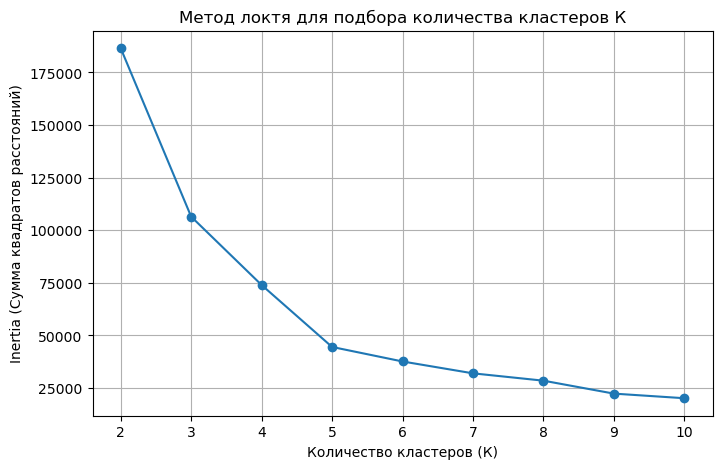

In [13]:
n_clusters = list(range(2, 11))

metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(df_3)
    metrics.append(km.inertia_)

#sns.lineplot(n_clusters, metrics)

plt.figure(figsize=(8, 5))
plt.plot(n_clusters, metrics, marker='o')
plt.xlabel('Количество кластеров (К)')
plt.ylabel('Inertia (Сумма квадратов расстояний)')
plt.title('Метод локтя для подбора количества кластеров К')
plt.grid()
plt.show()

# Вывод из метод локтя:
Из полученногоо графика зависимости четко видно, что кривая имеет излом при количестве кластеров равном 5. Т.е. наше предположение о том, что нашу выборку можно разбить предварительно на 5 кластеров, нашло подтвеждение.

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [14]:
kmeans = KMeans(n_clusters = 5, random_state=42)

kmeans.fit(df_3)

#df_1['cluster'] = kmeans.labels_

points = kmeans.predict(df_3)

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Genre_Male', ylabel='Spending Score (1-100)'>

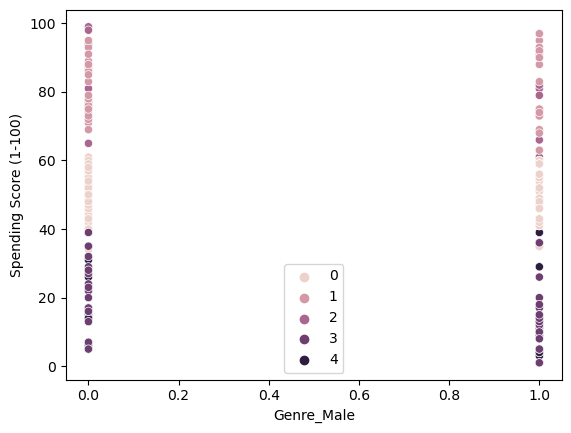

In [15]:
sns.scatterplot(x = df_3['Genre_Male'], y = df_3['Spending Score (1-100)'], hue=points)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

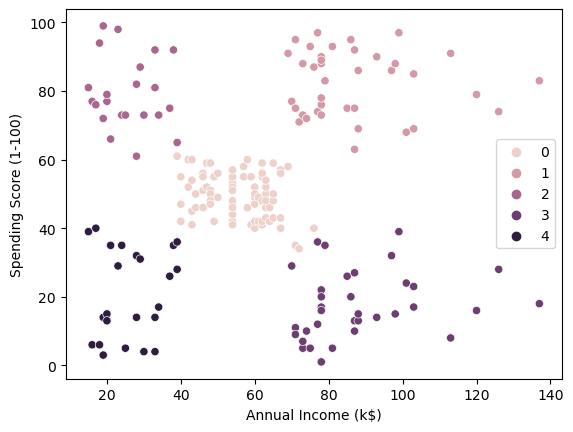

In [16]:
sns.scatterplot(x = df_3['Annual Income (k$)'], y = df_3['Spending Score (1-100)'], hue=points)

# Вывод из графика:
Из последнего ографика четко видно разбиение имеющихся данных на пять кластеров, т.е. первое выдвинутное предположение оказалось верным.
### В ходе математической обработки имеющегося массива данных, я пытался также включать в обработку признак Age, но это по каким-то, не установленным мной причинам приводило к ухудшению качества обработки. Кроме того, используя метод локтя я получал отличное от 5 значение количества кластеров, а сами точки имели явные области пересечения, что на мой взгляд является нелогичным.

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы. 

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). 

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.

In [17]:
centroids = kmeans.cluster_centers_
centroids

array([[55.2962963 ,  0.40740741, 49.51851852],
       [86.53846154,  0.46153846, 82.12820513],
       [25.72727273,  0.40909091, 79.36363636],
       [88.2       ,  0.54285714, 17.11428571],
       [26.30434783,  0.39130435, 20.91304348]])

In [18]:
df_centr = pd.DataFrame(centroids,
                       columns=['Annual Income (k$)', 'Genre_Male', 'Spending Score (1-100)'], index=None)
df_centr

,Annual Income (k$),Genre_Male,Spending Score (1-100)
0,55.296296,0.407407,49.518519
1,86.538462,0.461538,82.128205
2,25.727273,0.409091,79.363636
3,88.200000,0.542857,17.114286
4,26.304348,0.391304,20.913043


In [19]:
clusters = np.array([f'Cluster {i+1}' for i in range(kmeans.n_clusters)])
cl = pd.DataFrame()
cl['Cluster'] = pd.DataFrame(clusters)

df_centr = pd.concat([cl, df_centr], axis=1)
df_centr

,Cluster,Annual Income (k$),Genre_Male,Spending Score (1-100)
0,Cluster 1,55.296296,0.407407,49.518519
1,Cluster 2,86.538462,0.461538,82.128205
2,Cluster 3,25.727273,0.409091,79.363636
3,Cluster 4,88.200000,0.542857,17.114286
4,Cluster 5,26.304348,0.391304,20.913043


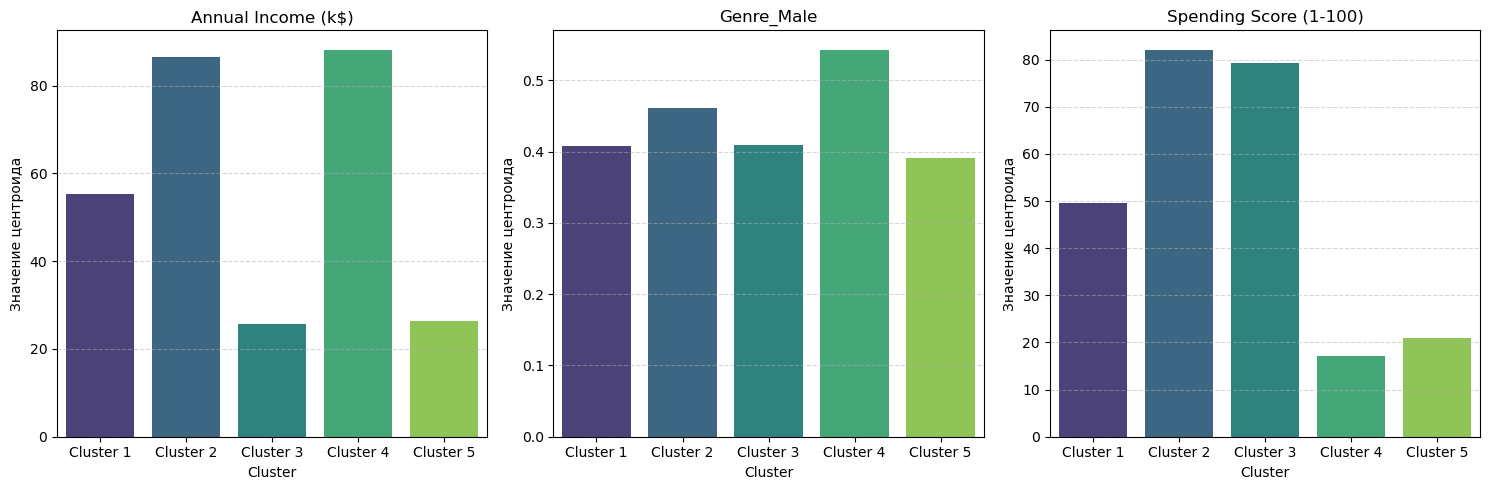

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(['Annual Income (k$)', 'Genre_Male', 'Spending Score (1-100)']):
    sns.barplot(
        data=df_centr,
        x='Cluster',
        y=feature,
        ax=axes[i],
        palette='viridis'
    )
    axes[i].set_title(feature)
    axes[i].set_ylabel('Значение центроида')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_11764\793010831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['cluster'] = kmeans.labels_


<function matplotlib.pyplot.show(close=None, block=None)>

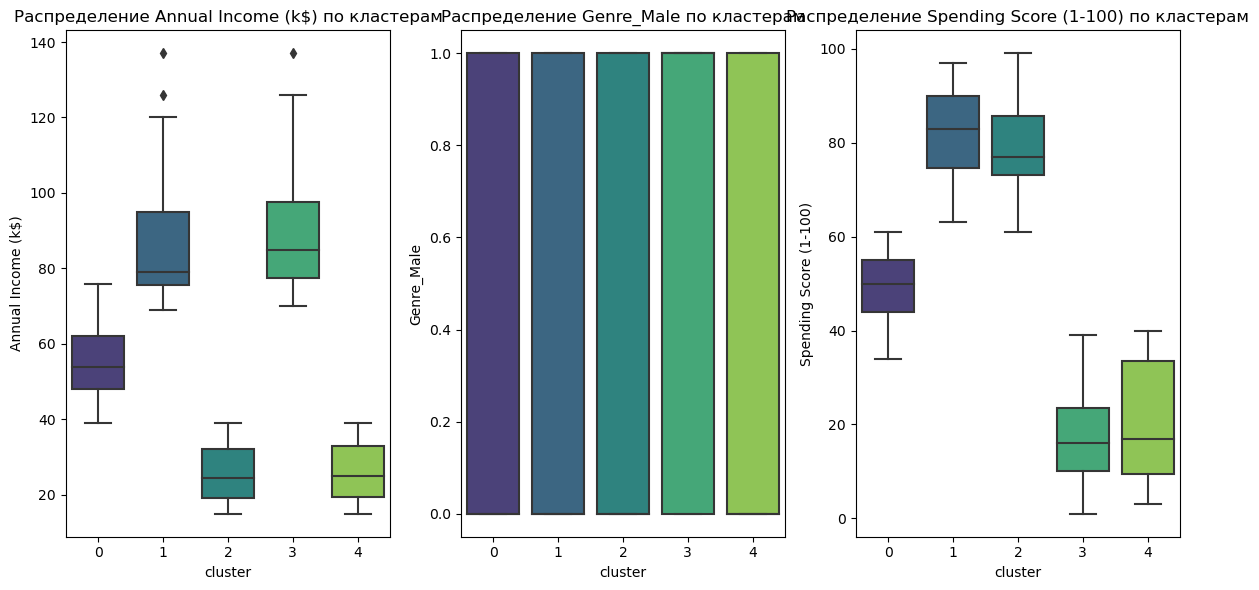

In [21]:
df_3['cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
for i, feature in enumerate(['Annual Income (k$)', 'Genre_Male', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_3, x='cluster', y=feature, palette='viridis')
    plt.title(f'Распределение {feature} по кластерам')
plt.tight_layout()
plt.show

# Вывод по последнему заданию:


Из проведенного графического анализа и значений центроидов, можно говорить о том, что образовавшиеся группы покупателей по кластерам имеют в среднем следующие характеристики:
1) К первому кластеру относятся люди, у которых в среднем среднегодовой доход составляет около 55000 долларов. Эти люди достаточно активно производят покупки, т.к. их баллы за покупки составляют почти 50 в среднем. В этой группе 41% мужчин.
2) Ко второму кластеру относятся люди, у которых в среднем среднеговодовой доход составляет 87000 долларов. Люди относящиеся к этому кластеру активнее всего производят в среднем покупки, т.к. их Spending Score равен в среднем 82 %. В этой группе 46% мужчин
3) К третьему кластеру относятся люди с самым низким среднегодовым доходом равным 25700 долларов. Несмотря на это, покупатели из данного кластера также также совершают много покупок, т.к. здесь Spending Score = 79. Можно сделать вывод, что к данной категории попали люди, которым нужны товары определённого класса. В этом кластере 41% мужчин.
4) В четвертом кластере несмотря, на самый большой среднегодовой доход равный 88200 долларов и содержащий 54,3% мужчин находятся покупатели с самым низким значением Spending Score = 17. Можно сделать предположение, что в данную группу попали мужчины, для которых предоставляемые товары не являются интересными и нужными.
5) В пятом кластере находятся покупатели с низким среднем годовым доходом равным 26300 долларов. В этом кластере меньше всего мужчин, окло 39%. А средняя величина Spending Score = 21.
